## Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

Build models to predict churn. The predictive model should serve two purposes:

- It should predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It should identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

The **business objective** is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. The main objective is to identify important predictor attributes which help the business understand indicators of churn.

Let's follow the below steps to identify the importatnt predictor attributes and to build a model which can predict the customer churn
1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)
2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).
3. Derive new features.
4. Reduce the number of variables using PCA.
5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).
6. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.
7. Finally, choose a model based on some evaluation metric.

### 1. Data Understanding & Feature Engineering

In [1]:
# importing necessary libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = 300
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# importing data
telecom_raw = pd.read_csv('telecom_churn_data.csv')
telecom_raw.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [3]:
telecom_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [4]:
telecom_raw.shape

(99999, 226)

In [5]:
# lets have a look at numerical columns
telecom_raw.describe(percentiles=[0.25,0.5,0.7,0.75])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

In [6]:
# lets have a look at categorical columns
telecom_raw.select_dtypes('object')

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/3/2014,7/20/2014,8/26/2014,9/25/2014,NaN,NaN,NaN,NaN
99995,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/17/2014,8/24/2014,9/26/2014,NaN,NaN,NaN,NaN
99996,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/13/2014,7/26/2014,NaN,9/2/2014,6/13/2014,NaN,NaN,NaN
99997,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014


In [7]:
# getting unique value counts for categorical variables
for col in telecom_raw.select_dtypes('object').columns:
    print(telecom_raw[col].value_counts(dropna=False))
    print()
    print('********************************************')

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64

********************************************
7/31/2014    99398
NaN            601
Name: last_date_of_month_7, dtype: int64

********************************************
8/31/2014    98899
NaN           1100
Name: last_date_of_month_8, dtype: int64

********************************************
9/30/2014    98340
NaN           1659
Name: last_date_of_month_9, dtype: int64

********************************************
6/30/2014    16960
6/29/2014    12918
6/27/2014    11169
6/28/2014     9491
6/26/2014     5530
6/25/2014     4896
6/17/2014     4145
6/24/2014     4129
6/14/2014     3845
6/21/2014     3747
6/23/2014     2908
6/18/2014     2747
6/12/2014     2511
6/22/2014     2344
6/13/2014     2147
6/19/2014     2009
6/20/2014     1803
NaN           1607
6/16/2014     1126
6/15/2014      873
6/11/2014      579
6/8/2014       520
6/5/2014       327
6/7/2014       322
6/10/2014      283
6/3/2014       233
6/1/2014       218
6/9/20

Columns like last_date_of_month_6, last_date_of_month_7, last_date_of_month_8 and last_date_of_month_9 can be dropped as they have only one value and wont contribute much to the model

In [8]:
telecom_raw.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

#### Missing values imputation

In [9]:
100*(telecom_raw.isnull().sum()/len(telecom_raw.index))

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
last_date_of_month_7        0.60
last_date_of_month_8        1.10
last_date_of_month_9        1.66
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t

In [10]:
# droping 'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9' 
# as they dont contribute much to the model
telecom = telecom_raw.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'], axis=1)

In [11]:
# droping irrelavent columns as they dont contribute much to the model
telecom = telecom.drop(['mobile_number','circle_id'], axis=1)

In [12]:
# UDF for plotting box plots
def draw_box_plot(cols):
    plt.figure(figsize=(20,10))
    sns.boxplot(x="variable", y="value", data=pd.melt(telecom[cols]))
    plt.xticks(rotation=45)
    plt.show()

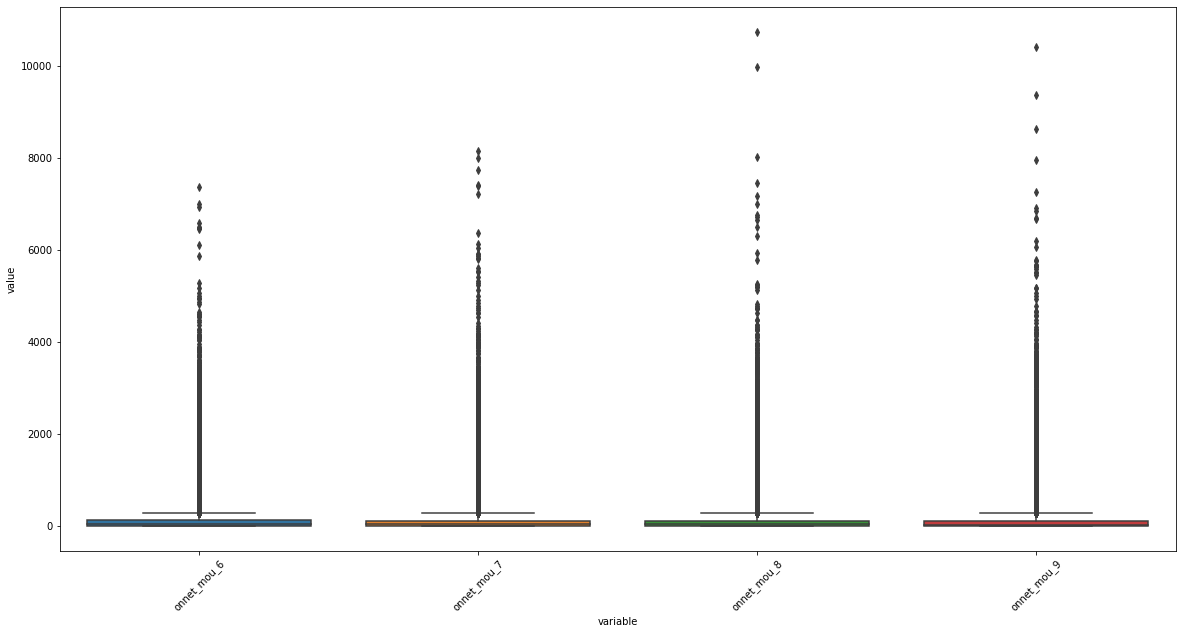

In [13]:
# on network minutes of usage cols
onnet_mou_cols = [col for col in telecom.columns if 'onnet_mou' in col]
draw_box_plot(onnet_mou_cols)

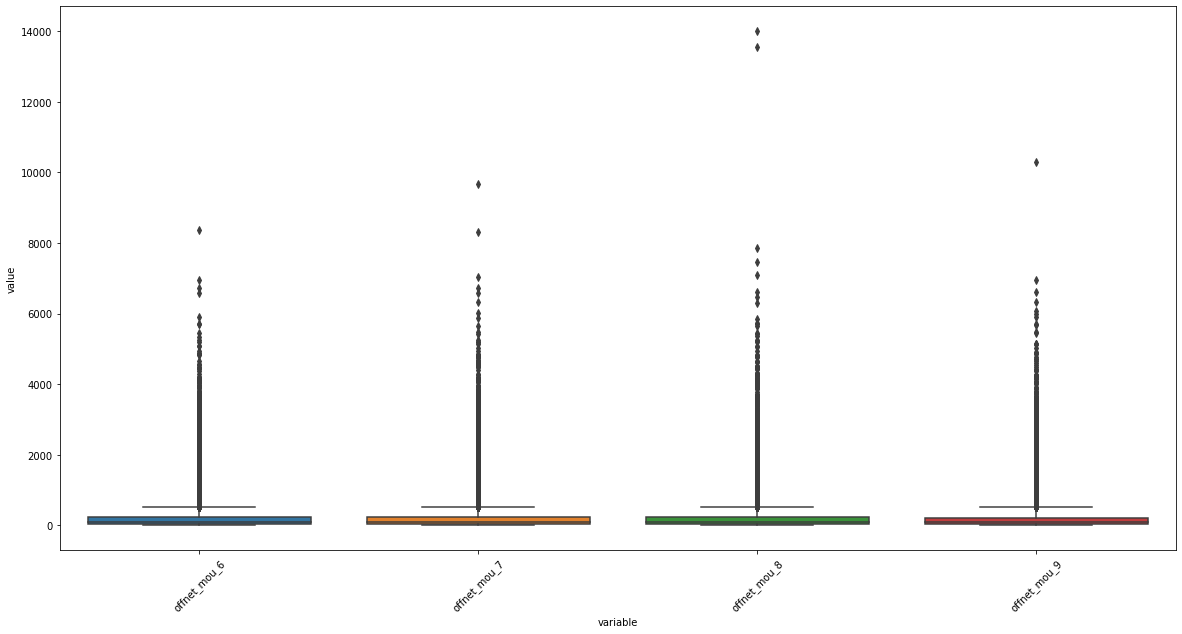

In [14]:
# off network minutes of usage cols
offnet_mou_cols = [col for col in telecom.columns if 'offnet_mou' in col]
draw_box_plot(offnet_mou_cols)

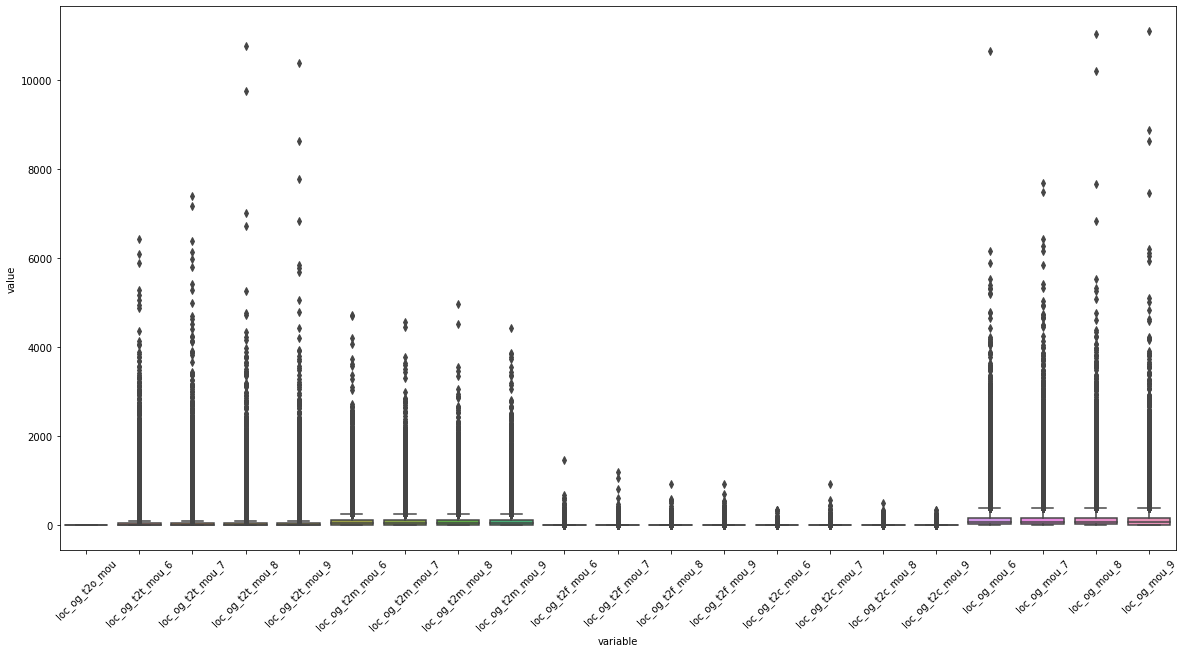

In [15]:
loc_og_cols  = [col for col in telecom.columns if 'loc_og' in col]
draw_box_plot(loc_og_cols)

Customers with null values means that the particular attribute is not applicable to them. We can use any of the below approached to ipute the missing values:
- Most of the attribute values are skewed, lets use median to impute missing values for numerical columns
- As they may not be applicable to them, we can impute directly with 0

In [16]:
# replacing missing values with their median
for col in telecom.loc[:, telecom.isna().any()].select_dtypes(['int64','float64']).columns:
    telecom.loc[telecom[col].isna(), col] = telecom[col].median()
#     telecom.loc[telecom[col].isna(), col] = 0

In [17]:
100*(telecom.isnull().sum()/len(telecom.index))

loc_og_t2o_mou              0.00
std_og_t2o_mou              0.00
loc_ic_t2o_mou              0.00
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 0.00
onnet_mou_7                 0.00
onnet_mou_8                 0.00
onnet_mou_9                 0.00
offnet_mou_6                0.00
offnet_mou_7                0.00
offnet_mou_8                0.00
offnet_mou_9                0.00
roam_ic_mou_6               0.00
roam_ic_mou_7               0.00
roam_ic_mou_8               0.00
roam_ic_mou_9               0.00
roam_og_mou_6               0.00
roam_og_mou_7               0.00
roam_og_mou_8               0.00
roam_og_mou_9               0.00
loc_og_t2t_mou_6            0.00
loc_og_t2t_mou_7            0.00
loc_og_t2t_mou_8            0.00
loc_og_t2t_mou_9            0.00
loc_og_t2m_mou_6            0.00
loc_og_t2m_mou_7            0.00
loc_og_t2m_mou_8            0.00
loc_og_t2m

Lets derive new attributes from date_of_last_rech, representing whether they have recharged in that particular month or not

In [18]:
# deriving new varibales whether the customer recharged in current month or not
for col in telecom.select_dtypes('object').columns:
    if 'date_of_last_rech_data' in col:
        telecom['last_data_rech_'+col[-1]] = telecom[col].apply(lambda x : 0 if pd.isna(x) else 1)
    elif 'date_of_last_rech' in col:
        telecom['last_rech_'+col[-1]] = telecom[col].apply(lambda x : 0 if pd.isna(x) else 1)
telecom = telecom.drop(telecom.select_dtypes('object').columns, axis=1)

In [19]:
telecom.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,last_rech_6,last_rech_7,last_rech_8,last_rech_9,last_data_rech_6,last_data_rech_7,last_data_rech_8,last_data_rech_9
0,0.00,0.00,0.00,197.38,214.82,213.80,21.10,34.31,32.33,0.00,29.84,96.31,91.73,0.00,87.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.11,63.69,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.63,0.00,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.64,11.09,0.00,8.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.00,1.00,1.00,2.00,252.00,252.00,252.00,145.00,0.00,0.00,0.00

In [20]:
# exploring 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'
print(telecom['loc_og_t2o_mou'].value_counts())
print(telecom['std_og_t2o_mou'].value_counts())
print(telecom['loc_ic_t2o_mou'].value_counts())

0.00    99999
Name: loc_og_t2o_mou, dtype: int64
0.00    99999
Name: std_og_t2o_mou, dtype: int64
0.00    99999
Name: loc_ic_t2o_mou, dtype: int64


In [21]:
# dropping 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou' as they dont have relevant data
telecom = telecom.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1)

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

- The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

- The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

- The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

Lets follow the above mentioned criteria

In [22]:
# extracting the common columns in good, action and churn phase of customer
common_cols = [col.split('_6')[0]  for col in telecom.select_dtypes(['int64','float64']).columns if '_6' in col]
common_cols.remove('last_rech')
common_cols.remove('last_data_rech')
common_cols

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_t2c_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_t2o_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user']

In [23]:
# segregating the data into good, action and churn phases of customer
for col in common_cols:
    # adding 6 & 7 month data into indicate good phase of customer
    telecom[col+'_good'] = (telecom[col+'_6']+telecom[col+'_7'])/2
    
     # renaming cols related to 8th month as action
    telecom = telecom.rename(columns={col+'_8': col+'_action'})
    
    # droping the columns with older representation
    telecom = telecom.drop([col+'_6',col+'_7'], axis=1)
    
telecom.head()

,arpu_action,arpu_9,onnet_mou_action,onnet_mou_9,offnet_mou_action,offnet_mou_9,roam_ic_mou_action,roam_ic_mou_9,roam_og_mou_action,roam_og_mou_9,loc_og_t2t_mou_action,loc_og_t2t_mou_9,loc_og_t2m_mou_action,loc_og_t2m_mou_9,loc_og_t2f_mou_action,loc_og_t2f_mou_9,loc_og_t2c_mou_action,loc_og_t2c_mou_9,loc_og_mou_action,loc_og_mou_9,std_og_t2t_mou_action,std_og_t2t_mou_9,std_og_t2m_mou_action,std_og_t2m_mou_9,std_og_t2f_mou_action,std_og_t2f_mou_9,std_og_t2c_mou_action,std_og_t2c_mou_9,std_og_mou_action,std_og_mou_9,isd_og_mou_action,isd_og_mou_9,spl_og_mou_action,spl_og_mou_9,og_others_action,og_others_9,total_og_mou_action,total_og_mou_9,loc_ic_t2t_mou_action,loc_ic_t2t_mou_9,loc_ic_t2m_mou_action,loc_ic_t2m_mou_9,loc_ic_t2f_mou_action,loc_ic_t2f_mou_9,loc_ic_mou_action,loc_ic_mou_9,std_ic_t2t_mou_action,std_ic_t2t_mou_9,std_ic_t2m_mou_action,std_ic_t2m_mou_9,std_ic_t2f_mou_action,std_ic_t2f_mou_9,std_ic_t2o_mou_action,std_ic_t2o_mou_9,std_ic_mou_action,std_ic_mou_9,total_ic_mou_action,total_ic_mou_9,spl_ic_mou_action,spl_ic_mou_9,isd_ic_mou_action,isd_ic_mou_9,ic_others_action,ic_others_9,total_rech_num_action,total_rech_num_9,total_rech_amt_action,total_rech_amt_9,max_rech_amt_action,max_rech_amt_9,last_day_rch_amt_action,last_day_rch_amt_9,total_rech_data_action,total_rech_data_9,max_rech_data_action,max_rech_data_9,count_rech_2g_action,count_rech_2g_9,count_rech_3g_action,count_rech_3g_9,av_rech_amt_data_action,av_rech_amt_data_9,vol_2g_mb_action,vol_2g_mb_9,vol_3g_mb_action,vol_3g_mb_9,arpu_3g_action,arpu_3g_9,arpu_2g_action,arpu_2g_9,night_pck_user_action,night_pck_user_9,monthly_2g_action,monthly_2g_9,sachet_2g_action,sachet_2g_9,monthly_3g_action,monthly_3g_9,sachet_3g_action,sachet_3g_9,fb_user_action,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,last_rech_6,last_rech_7,last_rech_8,last_rech_9,last_data_rech_6,last_data_rech_7,last_data_rech_8,last_data_rech_9,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_t2c_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_t2o_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,total_rech_data_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,av_rech_amt_data_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,arpu_2g_good,night_pck_user_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,fb_user_good
0,213.80,21.10,0.00,29.84,0.00,87.29,0.00,0.00,0.00,0.00,0.00,11.26,0.00,39.12,0.00,0.00,0.00,0.00,0.00,61.84,0.00,0.00,0.00,2.50,0.00,0.00,0.00,0.00,0.00,8.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,15.66,4.13,56.61,1.15,0.96,5.44,91.64,0.00,0.00,0.00,1.74,0.00,0.00,0.00,0.00,0.00,5.38,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,6,252,0,252,0,252,0,1.00,2.00,252.00,145.00,0.00,1.00,1.00,0.00,252.00,164.00,5.75,0.00,109.61,0.00,212.17,2.60,212.17,14.80,0.00,0.00,0,0,0,0,1,0,0,0,1.00,1.00,968,30.40,0.00,101.20,3.58,1,1,1,1,1,1,1,0,206.10,33.32,94.02,0.00,0.00,11.76,40.73,0.00,0.00,64.40,0.00,3.79,0.00,0.00,11.37,0.00,0.00,0.00,0.00,15.71,56.78,0.91,92.36,0.00,2.04,0.00,0.00,5.92,0.00,0.00,0.00,0.00,3.50,307.00,252.00,252.00,1.00,252.00,0.00,1.00,252.00,15.72,117.16,212.17,212.17,0.00,0.00,0.00,1.00,0.00,1.00
1,268.32,86.28,7.68,18.34,304.76,53.76,0.00,0.00,0.00,0.00,7.68,18.34,291.86,53.76,0.00,0.00,0.00,0.00,299.54,72.11,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0.13,0.00,0.00,0.00,12.76,0.00,0.00,0.00,312.44,72.11,29.23,116.09,375.58,56.93,3.61,0.00,408.43,173.03,2.35,0.00,12.49,15.01,0.00,0.00,0.00,0.00,14.84,15.01,423.28,188.04,0.00,0.00,0.00,0.00,0.00,0.00,11,5,2

In [24]:
# calulating last recharge in good phase, action phase
telecom['last_rech_good'] = telecom['last_rech_6'] | telecom['last_rech_7']
telecom['last_data_rech_good'] = telecom['last_data_rech_6'] | telecom['last_data_rech_7']
telecom = telecom.rename(columns={'last_data_rech_8':'last_data_rech_action','last_rech_8':'last_rech_action'})
telecom = telecom.drop(['last_rech_6','last_rech_7','last_data_rech_6','last_data_rech_7'], axis=1)

In [25]:
# calculating vbc in good and action phase
telecom['vbc_3g_good'] = telecom['jun_vbc_3g'] + telecom['jul_vbc_3g']
telecom = telecom.drop(['sep_vbc_3g','jun_vbc_3g','jul_vbc_3g'], axis=1)
telecom = telecom.rename(columns={'aug_vbc_3g':'vbc_3g_action'})

#### Filtering high-value customers

In [26]:
# calculating 70% of total customer data recharge amount in good phase
telecom['total_rech_data_amt_good'] = telecom['av_rech_amt_data_good'] * telecom['total_rech_data_good']

In [27]:
# total recharge including data
telecom['total_rech_and_data_amt_good'] = (telecom['total_rech_amt_good']+telecom['total_rech_data_amt_good'])/2

In [28]:
# calculating 70% of total customer recharge amount in good phase
avg_rech_good_phase = round(np.quantile(telecom['total_rech_and_data_amt_good'], 0.7),2)
avg_rech_good_phase

289.5

In [29]:
telecom_high = telecom[telecom['total_rech_and_data_amt_good'] > avg_rech_good_phase]
telecom_high.shape

(29941, 164)

The total high value customers available are 29.9k

#### Tagging customer churn attribute

In [30]:
# tagging customers churn attribute based on total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 is 0
telecom_high['churn'] = 0
telecom_high.loc[(telecom_high['total_ic_mou_9'] == 0) & (telecom_high['total_og_mou_9'] == 0) 
            & (telecom_high['vol_2g_mb_9'] == 0) & (telecom_high['vol_3g_mb_9'] == 0), 'churn'] = 1
telecom_high['churn'].value_counts()

0    27416
1     2525
Name: churn, dtype: int64

About 10% of the high valued customers have churned, which is clear case of class-imbalance. We should try using class-imbalance techniques to handle class imbalance.

In [31]:
# dropping churn phase columns
churn_cols = [col+'_9' for col in common_cols]
churn_cols.append('last_data_rech_9')
churn_cols.append('last_rech_9')
telecom_high = telecom_high.drop(churn_cols, axis=1)
telecom_high = telecom_high.reset_index(drop=True)
telecom_high.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,std_og_t2c_mou_action,std_og_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,total_og_mou_action,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,std_ic_t2o_mou_action,std_ic_mou_action,total_ic_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,total_rech_data_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,av_rech_amt_data_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,fb_user_action,aon,vbc_3g_action,last_rech_action,last_data_rech_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_t2c_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_t2o_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,total_rech_data_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,av_rech_amt_data_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,arpu_2g_good,night_pck_user_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,fb_user_good,last_rech_good,last_data_rech_good,vbc_3g_good,total_rech_data_amt_good,total_rech_and_data_amt_good,churn
0,3171.48,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,0.00,77.84,10.01,6.50,0.00,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,0.00,193.94,428.74,0.00,31.59,15.14,7,3638,1580,779,1.00,145.00,1.00,0.00,154.00,0.00,0.00,0.88,9.27,0.00,0,0,0,0,1.00,802,57.74,1,0,1209.51,56.26,510.29,24.86,18.16,41.38,378.00,58.64,0.00,478.03,13.79,40.83,13.37,0.00,68.00,0.09,2.25,0.00,548.38,45.20,219.53,126.81,391.56,24.36,109.22,43.22,0.00,176.81,592.25,0.10,8.29,15.46,5.00,1185.00,1185.00,0.00,1.00,145.00,1.00,0.00,154.00,0.00,0.00,0.45,9.82,0.00,0.00,0.00,0.00,0.00,1.00,1,0,38.12,154.00,669.50,1
1,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,0.00,98.28,0.00,10.23,0.00,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.00,0.75,16.54,0.00,0.00,0.00,14,120,30,10,3.00,23.00,3.00,0.00,69.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,1.00,315,21.03,1,1,435.47,382.36,87.64,0.00,0.00,257.36,75.77,0.00,0.00,333.13,125.00,11.86,0.00,0.00,136.87,0.00,0.00,0.00,470.01,16.84,35.78,0.00,52.63,0.29,13.25,0.00,0.00,13.54,66.17,0.00,0.00,0.00,20.00,519.00,122.00,25.00,1.50,149.50,1.50,0.00,165.50,178.00,375.48,0.24,5.42,0.00,0.50,0.50,0.00,0.00,1.00,1,1,1032.81,248.25,383.62,0
2,187.89,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,0.00,21.53,0.00,5.91,0.00,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,0.00,82.44,294.46,0.00,0.23,0.00,2,160,130,130,1.00,145.00,1.00,0.00,154.00,0.00,0.00,0.88,9.27,0.00,0,0,0,0,1.00,511,0.00,1,0,365.42,62.26,263.01,1.42,8.87,53.88,209.64,2.24,0.00,265.77,5.23,43.75,0.00,0.00,48.99,0.00,1.63,0.00,316.41,56.38,188.25,8.70,253.35,73.72,45.88,0.26,0.00,119.86,373.21,0.00,0.00,0.00,8.00,459.00,110.00,100.00,1.00,145.00,1.00,0.00,154.00,0.00,0.00,0.45,9.82,0.00,0.00,0.00,0.00,0.00,1.00,1,0,24.34,154.00,306.50,0
3,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,0.00,938.79,0.00,0.00,0.00,1068.54,19.54

In [32]:
telecom_high.shape

(29941, 112)

The no. of attributes we have now, after droping the churn phase related cols is 112

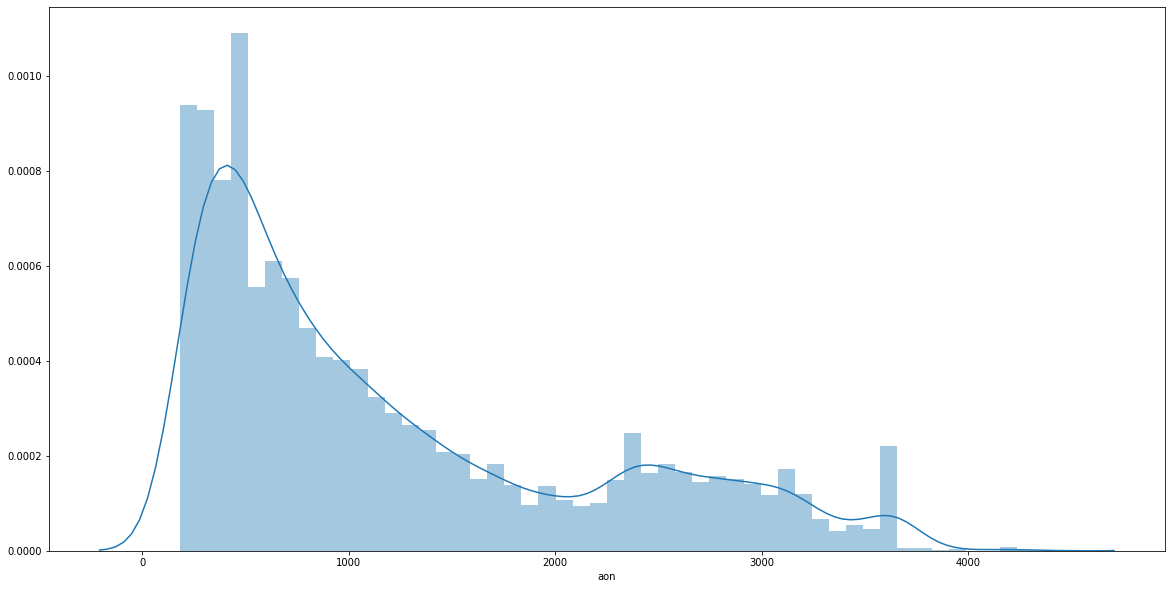

In [33]:
# Age on network distribution plot
plt.figure(figsize=(20,10))
sns.distplot(telecom_high['aon'])
plt.show()

In [34]:
# UDF to plot bar plot againt churn rate
def plot_churn_rate(col_bin, df, title):
    labels = ['VL', 'L', 'M', 'H', 'VH']
    df[col_bin+'_bin'] = pd.qcut(df[col_bin],q=[0, .2, .4, .6, .8, 1],labels=labels)
    churn_rate = df.groupby(col_bin+'_bin')['churn'].sum()*100/len(df.index)
    pd.DataFrame(churn_rate).plot(kind='bar', figsize=(10,5), title=title)
    pd.DataFrame(churn_rate).plot(kind='line', figsize=(10,5), title=title)
    plt.show()

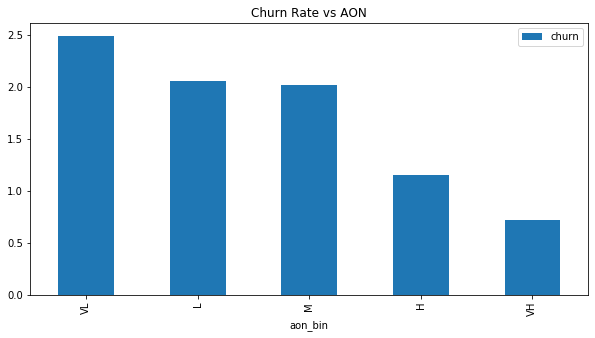

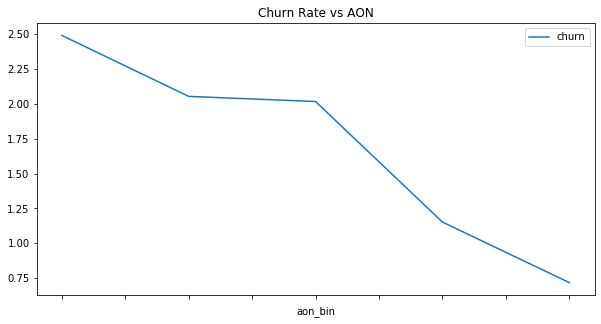

In [35]:
# AON vs churn
df = telecom_high[['aon','churn']]
plot_churn_rate('aon',df,'Churn Rate vs AON')

##### Insights:
As age of the customer increases the churn rate decreases, i.e., the loyal customers are not churing but the newly added customers are churning quickly

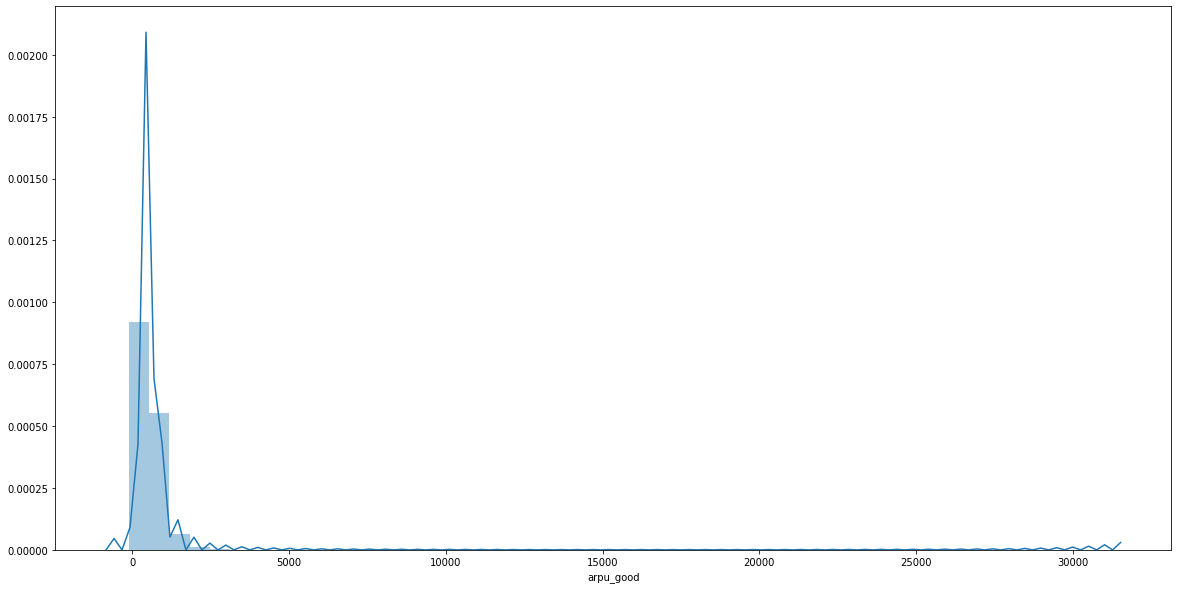

In [36]:
# ARPU good phase distribution plot
plt.figure(figsize=(20,10))
sns.distplot(telecom_high['arpu_good'])
plt.show()

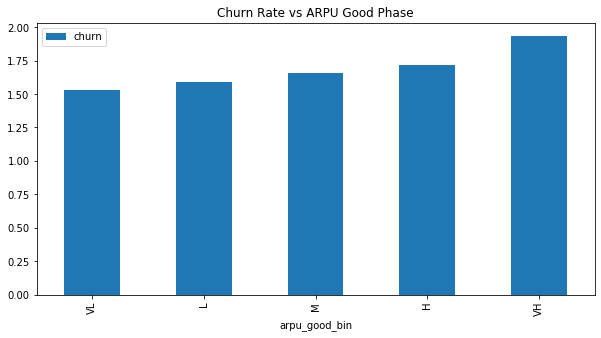

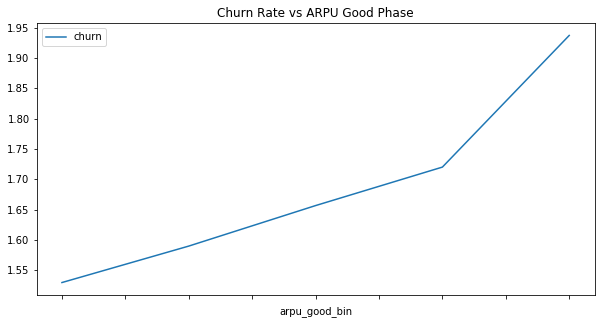

In [37]:
# ARPU GOOD vs churn rate
df = telecom_high[['arpu_good','churn']]
plot_churn_rate('arpu_good', df,'Churn Rate vs ARPU Good Phase')

##### Insights:
No much change in churn with change in ARPU in good phase

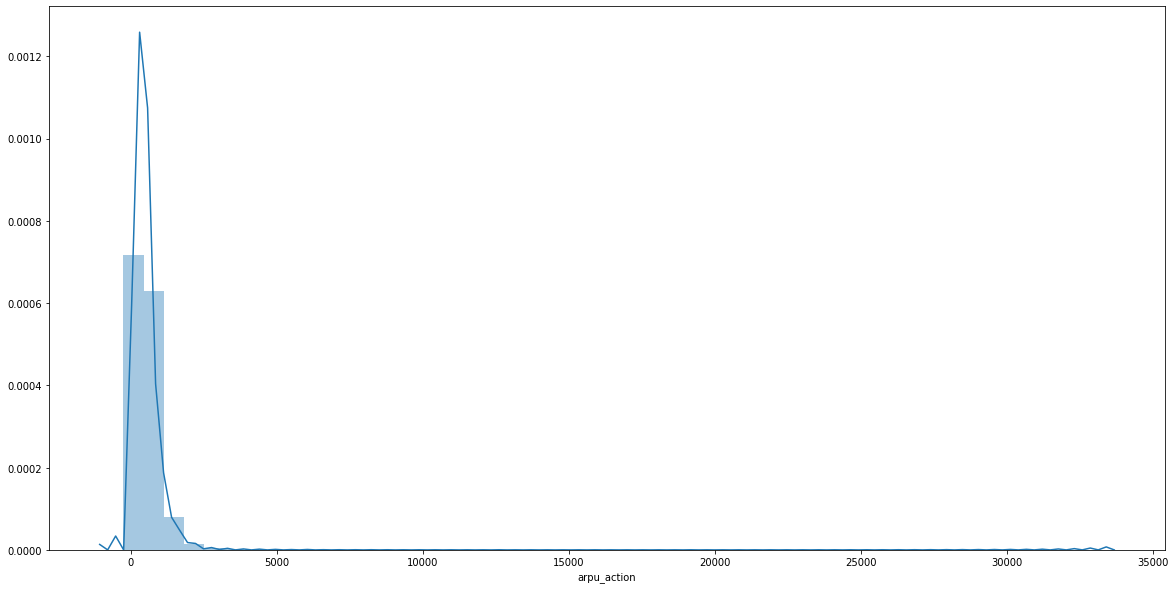

In [38]:
# ARPU action phase distribution plot
plt.figure(figsize=(20,10))
sns.distplot(telecom_high['arpu_action'])
plt.show()

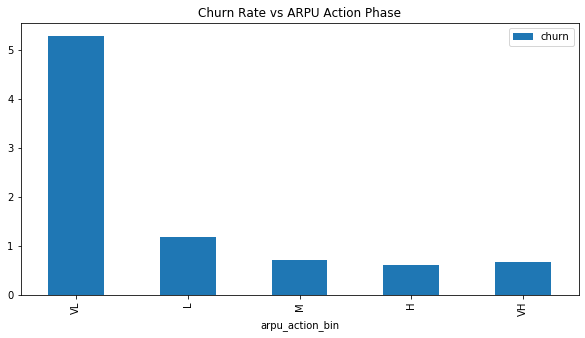

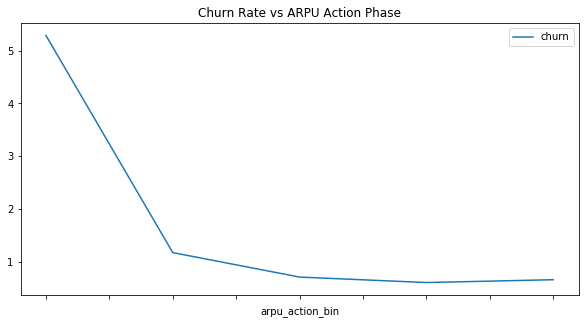

In [39]:
# ARPU action vs churn rate
df = telecom_high[['arpu_action','churn']]
plot_churn_rate('arpu_action', df,'Churn Rate vs ARPU Action Phase')

##### Insights:
When the average revenue is **low** in the **action phase**, then the customer is **most likely to churn**

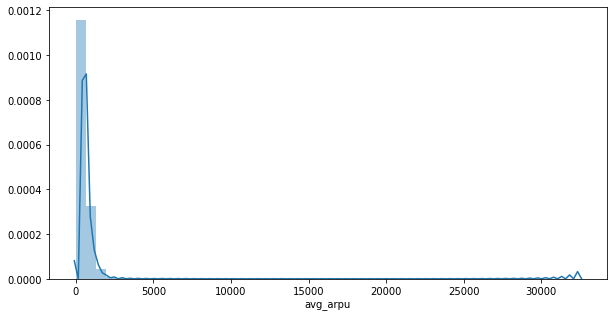

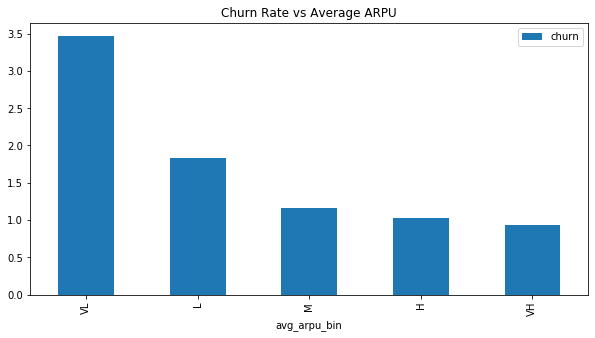

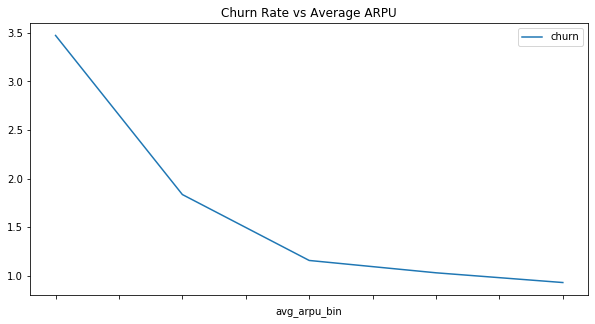

In [40]:
## Average ARPU vs churn rate
df = telecom_high[['arpu_good','arpu_action','churn']]
df['avg_arpu'] = (df['arpu_good'] + df['arpu_action'])/2
plt.figure(figsize=(10,5))
sns.distplot(df['avg_arpu'])
plot_churn_rate('avg_arpu', df,'Churn Rate vs Average ARPU')

##### Insights:
When **Average ARPU** of the customer in good and action phase is **low**. then the customer is **more likely to churn**

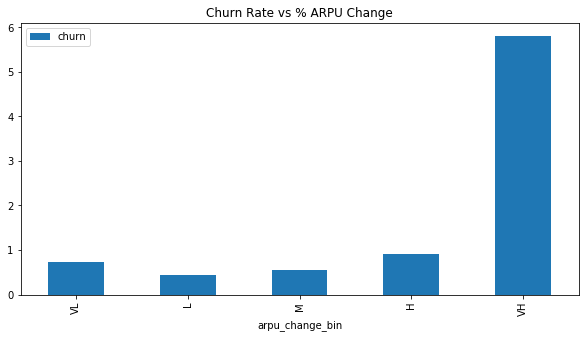

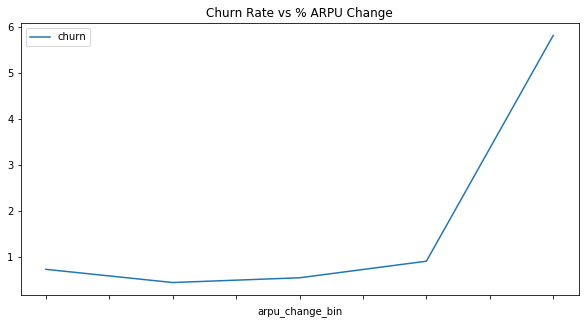

In [41]:
## %Change in ARPU vs churn rate
df = telecom_high[['arpu_good','arpu_action','churn']]
df['arpu_change'] = df[['arpu_action','arpu_good']].pct_change(axis=1)['arpu_good']
plot_churn_rate('arpu_change', df,'Churn Rate vs % ARPU Change')

##### Insights:
When **% Change in ARPU** of the customer from good and action phase is **High**. then the customer is **more likely to churn**

In [42]:
## Customer calls to call center
vol_cols = [col for col in telecom_high.columns if 'vol' in col]
vol_cols

['vol_2g_mb_action', 'vol_3g_mb_action', 'vol_2g_mb_good', 'vol_3g_mb_good']

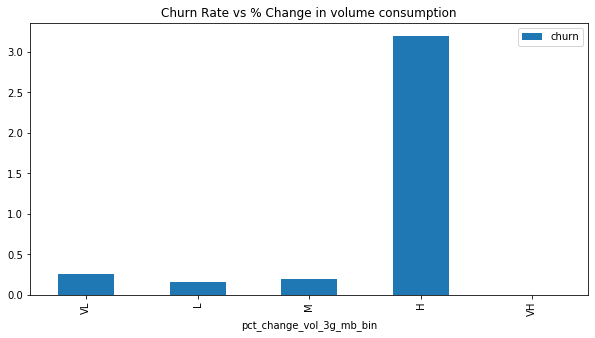

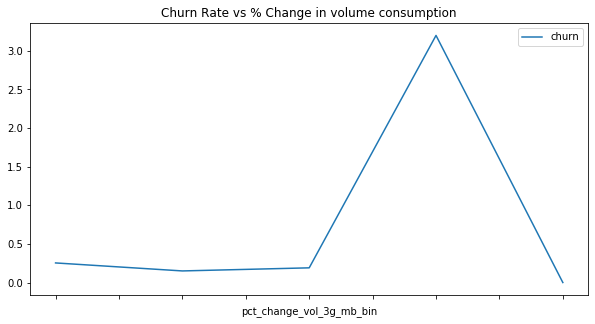

In [43]:
# Volume consumption vs churn
df = telecom_high[['vol_2g_mb_action', 'vol_3g_mb_action', 'vol_2g_mb_good', 'vol_3g_mb_good','churn']]
df['avg_vol_3g_mb_action'] = (df['vol_2g_mb_action'] + df['vol_3g_mb_action'])/2
df['avg_vol_3g_mb_good'] = (df['vol_2g_mb_good'] + df['vol_3g_mb_good'])/2
df['pct_change_vol_3g_mb'] = df[['avg_vol_3g_mb_action','avg_vol_3g_mb_good']].pct_change(axis=1)['avg_vol_3g_mb_good']
plot_churn_rate('pct_change_vol_3g_mb', df,'Churn Rate vs % Change in volume consumption')

##### Insights:
Churn rate is high when there is **high** drop in volume consumption

### Deriving new features
Lets generate new features from existing features by calculating
- Average of the values in good and action phase
- Difference of the values in good and action phase
- % Change of the values from good to action phase

In [44]:
new_feature_cols = ['total_og_mou','arpu','onnet_mou','offnet_mou','total_rech_num','total_rech_amt','av_rech_amt_data',
                    'total_rech_data']

In [45]:
# UDF to calculate average of good and action values
def avg_good_action_phase(col):
    telecom_high['avg_'+col] = (telecom_high[col+'_good']+telecom_high[col+'_action'])/2

In [46]:
# UDF to calculate difference of good and action values
def diff_good_action_phase(col):
    telecom_high['diff_'+col] = telecom_high[col+'_action'] - telecom_high[col+'_good']

In [47]:
# UDF to calculate % change from good to action phase
def pct_change_good_action_phase(col):
    df = telecom_high[[col+'_action',col+'_good']]
    telecom_high['pct_change_'+col] = 100*(np.abs(telecom_high[col+'_action'] - telecom_high[col+'_good'])/telecom_high[col+'_action'])

In [48]:
# Deriving new features
for col in new_feature_cols:
    avg_good_action_phase(col)
    diff_good_action_phase(col)
    pct_change_good_action_phase(col)

In [49]:
telecom_high.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,std_og_t2c_mou_action,std_og_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,total_og_mou_action,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,std_ic_t2o_mou_action,std_ic_mou_action,total_ic_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,total_rech_data_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,av_rech_amt_data_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,fb_user_action,aon,vbc_3g_action,last_rech_action,last_data_rech_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_t2c_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_t2o_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,total_rech_data_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,av_rech_amt_data_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,arpu_2g_good,night_pck_user_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,fb_user_good,last_rech_good,last_data_rech_good,vbc_3g_good,total_rech_data_amt_good,total_rech_and_data_amt_good,churn,avg_total_og_mou,diff_total_og_mou,pct_change_total_og_mou,avg_arpu,diff_arpu,pct_change_arpu,avg_onnet_mou,diff_onnet_mou,pct_change_onnet_mou,avg_offnet_mou,diff_offnet_mou,pct_change_offnet_mou,avg_total_rech_num,diff_total_rech_num,pct_change_total_rech_num,avg_total_rech_amt,diff_total_rech_amt,pct_change_total_rech_amt,avg_av_rech_amt_data,diff_av_rech_amt_data,pct_change_av_rech_amt_data,avg_total_rech_data,diff_total_rech_data,pct_change_total_rech_data
0,3171.48,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,0.00,77.84,10.01,6.50,0.00,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,0.00,193.94,428.74,0.00,31.59,15.14,7,3638,1580,779,1.00,145.00,1.00,0.00,154.00,0.00,0.00,0.88,9.27,0.00,0,0,0,0,1.00,802,57.74,1,0,1209.51,56.26,510.29,24.86,18.16,41.38,378.00,58.64,0.00,478.03,13.79,40.83,13.37,0.00,68.00,0.09,2.25,0.00,548.38,45.20,219.53,126.81,391.56,24.36,109.22,43.22,0.00,176.81,592.25,0.10,8.29,15.46,5.00,1185.00,1185.00,0.00,1.00,145.00,1.00,0.00,154.00,0.00,0.00,0.45,9.82,0.00,0.00,0.00,0.00,0.00,1.00,1,0,38.12,154.00,669.50,1,449.27,-198.22,56.61,2190.50,1961.97,61.86,54.28,-3.97,7.59,418.10,-184.38,56.58,6.00,2.00,28.57,2411.50,2453.00,67.43,154.00,0.00,0.00,1.00,0.00,0.00
1,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,0.00,98.28,0.00,10.23,0.00,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.00,0.75,16.54,0.00,0.00,0.00,14,120,30,10,3.00,23.00,3.00,0.00,69.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,1.00,315,21.03,1,1,435.47,382.36,87.64,0.00,0.00,257.36,75.77,0.00,0.00,333.13,125.00,11.86,0.00,0.00,136.87,0.00,0.00,0.00,470.01,16.84,35.78,0.00,52.63,0.29,13.25,0.00,0.00,13.54,66.17,0.00,0.00,0.00,20.00,519.00,122.00,25.00,1.50,149.50,1.50,0.00,165.50,178.00,375.48,0.24,5.42,0.00,0.50,0.50,0.00,0.00,1.00,1,1,1032.81,248.25,383.62,0,320.78,-298.45,173.96,286.42,-298.11,217.03,208.72,-347.28,989.97,112.06,48.83,35.78,17.00,-6.00,42.

In [50]:
100*(telecom_high.isnull().sum()/len(telecom_high.index))

arpu_action                    0.00
onnet_mou_action               0.00
offnet_mou_action              0.00
roam_ic_mou_action             0.00
roam_og_mou_action             0.00
loc_og_t2t_mou_action          0.00
loc_og_t2m_mou_action          0.00
loc_og_t2f_mou_action          0.00
loc_og_t2c_mou_action          0.00
loc_og_mou_action              0.00
std_og_t2t_mou_action          0.00
std_og_t2m_mou_action          0.00
std_og_t2f_mou_action          0.00
std_og_t2c_mou_action          0.00
std_og_mou_action              0.00
isd_og_mou_action              0.00
spl_og_mou_action              0.00
og_others_action               0.00
total_og_mou_action            0.00
loc_ic_t2t_mou_action          0.00
loc_ic_t2m_mou_action          0.00
loc_ic_t2f_mou_action          0.00
loc_ic_mou_action              0.00
std_ic_t2t_mou_action          0.00
std_ic_t2m_mou_action          0.00
std_ic_t2f_mou_action          0.00
std_ic_t2o_mou_action          0.00
std_ic_mou_action           

In [51]:
# correcting percentage change dataset
for col in new_feature_cols:
    max_val = telecom_high.loc[telecom_high['pct_change_'+col] != np.inf, 'pct_change_'+col].max()
    telecom_high['pct_change_'+col].replace(np.inf,max_val,inplace=True)
    telecom_high['pct_change_'+col].fillna(0, inplace=True)

## 2. Data Preparation

In [52]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

#### Standardization

In [53]:
# splitting to train & test data sets
y = telecom_high.pop('churn')
X = telecom_high

In [54]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [55]:
# class distribution in test and train
print(y_train.value_counts()*100/len(y_train))
print(y_test.value_counts()*100/len(y_test))

0   91.57
1    8.43
Name: churn, dtype: float64
0   91.56
1    8.44
Name: churn, dtype: float64


In [56]:
# Standardizing the data using StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X_train)

In [57]:
# scaling on the fitted on scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# reshaping y train and test
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

#### Dimension reduction using PCA

In [60]:
# initialing PCA to extract principal components 
pca = PCA(0.90, random_state=42)
pca.fit(X_train)

PCA(n_components=0.9, random_state=42)

In [61]:
# explained variance of pincipal components
pca.explained_variance_ratio_

array([0.10785876, 0.10213756, 0.06754881, 0.05753345, 0.0431846 ,
       0.03377063, 0.03244567, 0.0270423 , 0.0249976 , 0.02187465,
       0.02077551, 0.0198557 , 0.01928892, 0.01757992, 0.01722023,
       0.01644195, 0.01572306, 0.01533555, 0.01442042, 0.01422753,
       0.01336439, 0.01293786, 0.01172529, 0.01165971, 0.01108496,
       0.01045625, 0.01008042, 0.00962038, 0.00926003, 0.00907714,
       0.00883976, 0.00867656, 0.00800854, 0.0075726 , 0.00718607,
       0.00682589, 0.00668594, 0.0064825 , 0.00635326, 0.00625503,
       0.0060027 , 0.00585266, 0.0055757 , 0.00552627, 0.00552228,
       0.00508575])

In [62]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Making the scree plot to decide on number of PCA components

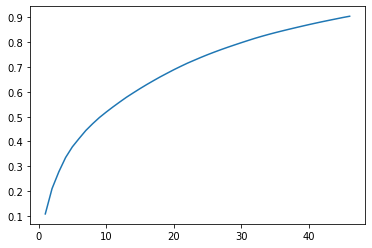

In [63]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.show()

Lets take the first 46 pricipal components which explain 90 of variance

In [64]:
pca.fit(X_train)

PCA(n_components=0.9, random_state=42)

In [65]:
X_train_pca = pca.transform(X_train)

In [66]:
X_train_pca.shape

(20958, 46)

### 3. Model Building & Evaluation

#### Building XG Boost base model without imbalance

In [67]:
# XG Boost Classifier initialization
xgb_classifier = XGBClassifier(random_state=42)

In [68]:
# building model with deault hyperparameters
xgb_classifier.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
# predicting on the train dataset
y_train_pred = xgb_classifier.predict(X_train_pca)

# evaluation of xgboost with default model
print('Train ROC-AUC : ', roc_auc_score(y_train, y_train_pred))
print('Train Precision : ', precision_score(y_train, y_train_pred))
print('Train Recall : ', recall_score(y_train, y_train_pred))
print('Train F1 : ', f1_score(y_train, y_train_pred))

# transforming X_test with PCA
X_test_pca = pca.transform(X_test)

# predicting on test datset
y_test_pred = xgb_classifier.predict(X_test_pca)

print('*************************')
# evaluation of xgboost with default model
print('Test ROC-AUC : ', roc_auc_score(y_test, y_test_pred))
print('Test Precision : ', precision_score(y_test, y_test_pred))
print('Test Recall : ', recall_score(y_test, y_test_pred))
print('Test F1 : ', f1_score(y_test, y_test_pred))

Train ROC-AUC :  0.9920769666100735
Train Precision :  1.0
Train Recall :  0.9841539332201471
Train F1 :  0.9920136908157444
*************************
Test ROC-AUC :  0.7104867231797002
Test Precision :  0.7033898305084746
Test Recall :  0.43799472295514513
Test F1 :  0.5398373983739837


Got AUC of train as 0.99 nad test as 0.71Seems like the model is overfitting with default params. Lets perform hyperparameter tuning to more generalize the model. As the data is imbalanced, lets try to tune below hyperparameters of xgboost
- learning_rate
- max_depth
- min_child_weight
- n_estimators
- scale_pos_weight

Lets start by assuming the values near to defaults {'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}

#### Imbalance handling: Using XGBoost hyperparameter scale_pos_weight

In [70]:
%%time
# 1st run for hyperparameters tuning
parameters = {'learning_rate': [0.05,0.1],
              'max_depth': [5,6],
              'min_child_weight': [1,2],
              'n_estimators': [100,150],
              'scale_pos_weight' : [1,10]}

# 3 fold cross validation
xgb_model = GridSearchCV(estimator=xgb_classifier,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       refit=True, verbose=1, scoring='roc_auc')

xgb_model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 11.8min finished


Wall time: 12min 1s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [71]:
# 1st run best model params
print(xgb_model.best_params_)
print(xgb_model.best_score_)
print(xgb_model.best_estimator_)

{'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'scale_pos_weight': 1}
0.8957011452825361
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [72]:
# predicting on the train dataset
y_train_pred = xgb_model.predict(X_train_pca)

# evaluation of xgboost with default model
print('Train ROC-AUC : ', roc_auc_score(y_train, y_train_pred))
print('Train Precision : ', precision_score(y_train, y_train_pred))
print('Train Recall : ', recall_score(y_train, y_train_pred))
print('Train F1 : ', f1_score(y_train, y_train_pred))

# transforming X_test with PCA
X_test_pca = pca.transform(X_test)

# predicting on test datset
y_test_pred = xgb_model.predict(X_test_pca)

print('*************************')
# evaluation of xgboost with default model
print('Test ROC-AUC : ', roc_auc_score(y_test, y_test_pred))
print('Test Precision : ', precision_score(y_test, y_test_pred))
print('Test Recall : ', recall_score(y_test, y_test_pred))
print('Test F1 : ', f1_score(y_test, y_test_pred))

Train ROC-AUC :  0.7488321978884591
Train Precision :  0.8578290105667628
Train Recall :  0.5053763440860215
Train F1 :  0.636039886039886
*************************
Test ROC-AUC :  0.6947952939666857
Test Precision :  0.7251184834123223
Test Recall :  0.40369393139841686
Test F1 :  0.5186440677966101


In [73]:
%%time
# 2nd run for hyperparameters tuning, with some fixed optimal values
parameters = {'learning_rate': [0.01,0.05],
              'max_depth': [4,5],
              'min_child_weight': [1],
              'n_estimators': [200,500],
              'scale_pos_weight' : [1,10]}

# 3 fold cross validation
xgb_model = GridSearchCV(estimator=xgb_classifier,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       refit=True, verbose=1, scoring='roc_auc')

xgb_model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 13.3min finished


Wall time: 13min 36s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [74]:
# 2nd run best model params
print(xgb_model.best_params_)
print(xgb_model.best_score_)
print(xgb_model.best_estimator_)

{'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 1}
0.8955908254603285
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [75]:
# predicting on the train dataset
y_train_pred = xgb_model.predict(X_train_pca)

# evaluation of xgboost with default model
print('Train ROC-AUC : ', roc_auc_score(y_train, y_train_pred))
print('Train Precision : ', precision_score(y_train, y_train_pred))
print('Train Recall : ', recall_score(y_train, y_train_pred))
print('Train F1 : ', f1_score(y_train, y_train_pred))

# transforming X_test with PCA
X_test_pca = pca.transform(X_test)

# predicting on test datset
y_test_pred = xgb_model.predict(X_test_pca)

print('*************************')
# evaluation of xgboost with default model
print('Test ROC-AUC : ', roc_auc_score(y_test, y_test_pred))
print('Test Precision : ', precision_score(y_test, y_test_pred))
print('Test Recall : ', recall_score(y_test, y_test_pred))
print('Test F1 : ', f1_score(y_test, y_test_pred))

Train ROC-AUC :  0.7741239681624248
Train Precision :  0.8806104129263914
Train Recall :  0.5551782682512734
Train F1 :  0.6810135369663312
*************************
Test ROC-AUC :  0.6941964536333818
Test Precision :  0.7261904761904762
Test Recall :  0.4023746701846966
Test F1 :  0.5178268251273345


#### Imbalance handling: Using SMOTE technique

In [76]:
# oversampling the train dataset using SMOTE
smt = SMOTE(random_state=42)
X_train_sm, y_train_sm = smt.fit_resample(X_train_pca, y_train)

In [77]:
# building models with optimal hyperparameters 
xgb_model = XGBClassifier(learning_rate=0.05, max_depth = 8, min_child_weight = 1, 
                          n_estimators = 200, scale_pos_weight = 1, random_state=42)

xgb_model.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
# predicting on the train dataset
y_train_pred = xgb_model.predict(X_train_pca)

# evaluation of xgboost with default model
print('Train ROC-AUC : ', roc_auc_score(y_train, y_train_pred))
print('Train Precision : ', precision_score(y_train, y_train_pred))
print('Train Recall : ', recall_score(y_train, y_train_pred))
print('Train F1 : ', f1_score(y_train, y_train_pred))

# transforming X_test with PCA
X_test_pca = pca.transform(X_test)

# predicting on test datset
y_test_pred = xgb_model.predict(X_test_pca)

print('*************************')
# evaluation of xgboost with default model
print('Test ROC-AUC : ', roc_auc_score(y_test, y_test_pred))
print('Test Precision : ', precision_score(y_test, y_test_pred))
print('Test Recall : ', recall_score(y_test, y_test_pred))
print('Test F1 : ', f1_score(y_test, y_test_pred))

Train ROC-AUC :  0.9889119289522652
Train Precision :  0.8178025034770514
Train Recall :  0.99830220713073
Train F1 :  0.8990825688073395
*************************
Test ROC-AUC :  0.7990709032728907
Test Precision :  0.47417840375586856
Test Recall :  0.6662269129287599
Test F1 :  0.5540318156884257


After tuning the XG Boost hyperparamaeters, the AUC score we achieved is 0.98 and the hyperparameters for the best model is {'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 1}

#### Feature Importance

In [79]:
# SMOTE
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [80]:
# building model to extract feature importance
xgb_model = XGBClassifier(learning_rate=0.05, max_depth = 8, min_child_weight = 1, 
                          n_estimators = 200, scale_pos_weight = 1, random_state=42)

xgb_model.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
# important features from model
features = pd.DataFrame(columns=['feature','score'])
features['feature'] = telecom_high.columns
features['score'] = xgb_model.feature_importances_

In [82]:
features.sort_values(by='score', ascending=False)

,feature,score
128,pct_change_total_rech_amt,0.23
4,roam_og_mou_action,0.08
28,total_ic_mou_action,0.04
54,last_data_rech_action,0.03
113,pct_change_total_og_mou,0.02
94,count_rech_3g_good,0.01
3,roam_ic_mou_action,0.01
9,loc_og_mou_action,0.01
35,last_day_rch_amt_action,0.01
107,last_data_rech_good,0.01


The most important features which indicate the churn rate are:
- % Change in Total recharge amount (total_rech_amt)
- roam_og_mou_action
- total_ic_mou_action
- last_data_rech_action (whether the user has atleast recharged data in action phase)
- % Change in Total outgoing minutes of usage (total_og_mou)

In [83]:
telecom_high['churn'] = y

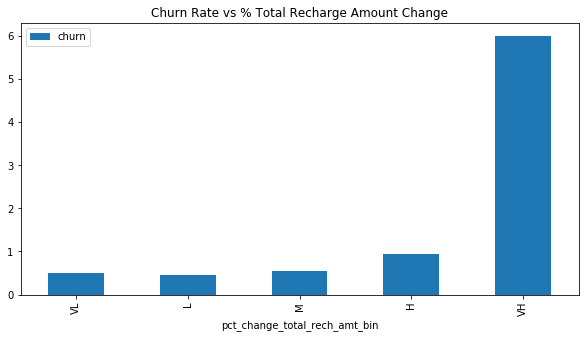

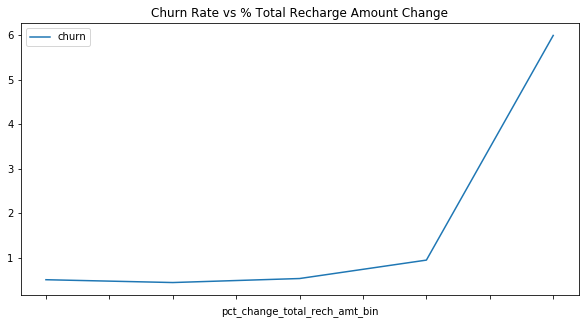

In [84]:
## %Change in Total recharge amount vs churn rate
df = telecom_high[['pct_change_total_rech_amt','churn']]
plot_churn_rate('pct_change_total_rech_amt', df,'Churn Rate vs % Total Recharge Amount Change')

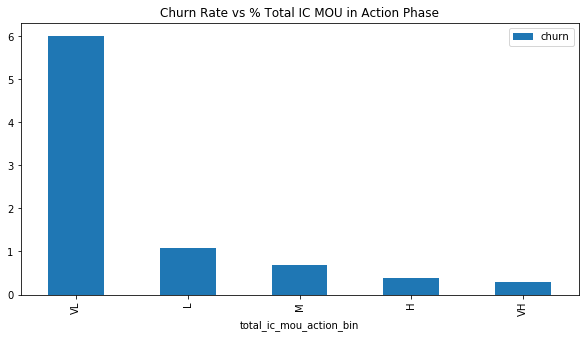

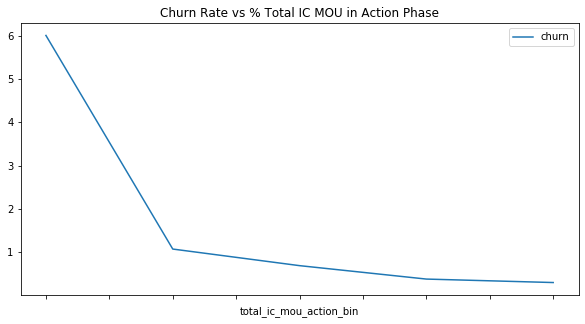

In [85]:
## Total Minutes of usage of incoming calls in action phase vs churn rate
df = telecom_high[['total_ic_mou_action','churn']]
plot_churn_rate('total_ic_mou_action', df,'Churn Rate vs % Total IC MOU in Action Phase')

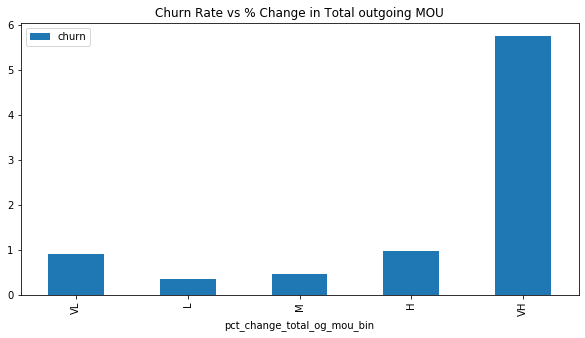

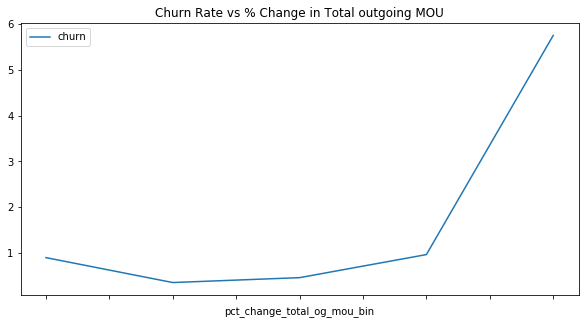

In [88]:
## %Chnage in Total outgoing minutes of usage vs churn rate
df = telecom_high[['pct_change_total_og_mou','churn']]
plot_churn_rate('pct_change_total_og_mou', df,'Churn Rate vs % Change in Total outgoing MOU')

### Recomendations

The network operator should monitor the below indicators which strongly explain the churn of the customer.
- When ever there is a % change (drop) in total recharge amount they should quickly rollout special offers to retain the customer as the user may be opting out
- When ever the customer is roaming from one circle to another then there is high probaility of him switching to another network, to retain the customer should rollout special offers better than other network operators or on par with other networks
- If total incoming calls are low then there is high change that the customer is about to churn, the network operator should immediately try to resolve thier concerns.
- When ever there a drop in the total outgoing MOU, the network operator should immediately try to resolve thier concerns.